In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings 
warnings.filterwarnings('ignore')

## Que 1.

In [3]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.shape

(21, 2)

In [6]:
# Drop duplicated values
data_cleaned1= data.drop_duplicates()

In [7]:
data_cleaned1.shape

(21, 2)

In [8]:
# Rename the columns
data_cleaned1.columns=['Del_Time','Sort_Time']
data_cleaned1.head()

,Del_Time,Sort_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [9]:
# Checking for null values
data_cleaned1.isnull().sum()

Del_Time     0
Sort_Time    0
dtype: int64

No null values in the dataset.


### Checking for Outliers

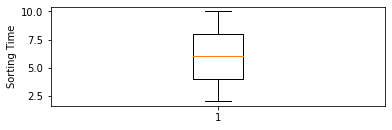

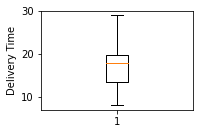

In [10]:
plt.subplot(2,1,2)
box_sort = plt.boxplot(data_cleaned1.Sort_Time)
plt.ylabel("Sorting Time")
plt.show()

plt.subplot(2,2,1)
box_del = plt.boxplot(data_cleaned1.Del_Time)
plt.ylabel("Delivery Time")
plt.show()


### No outliers detected.

In [11]:
data_cleaned1.describe()

,Del_Time,Sort_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [12]:
# Calculating the linear dependency
data_cleaned1.corr()

,Del_Time,Sort_Time
Del_Time,1.000000,0.825997
Sort_Time,0.825997,1.000000


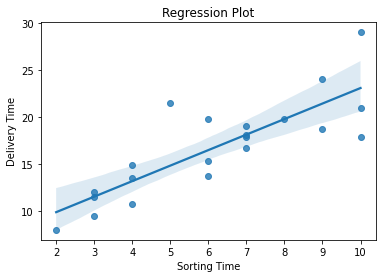

In [13]:
sns.regplot(data_cleaned1['Sort_Time'],data_cleaned1['Del_Time'])
plt.title("Regression Plot")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [14]:
model = sm.ols('Del_Time~Sort_Time',data=data_cleaned1).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Del_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           3.98e-06
Time:                        12:15:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sort_Time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.params

Intercept    6.582734
Sort_Time    1.649020
dtype: float64

In [17]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [18]:
print(model.pvalues, '\n' ,model.tvalues)

Intercept    0.001147
Sort_Time    0.000004
dtype: float64 
 Intercept    3.823349
Sort_Time    6.387447
dtype: float64


The regression model is,

### Delivery_Time =  6.582734 + 1.649020 * Sorting_Time

## Predict for new values of sorting time

In [19]:
new_data = pd.DataFrame({"Sort_Time":[10,5,8,15]})

In [20]:
new_data

,Sort_Time
0,10
1,5
2,8
3,15


In [21]:
Delivery_Time_pred = model.predict(new_data)
Delivery_Time_pred

0    23.072933
1    14.827833
2    19.774893
3    31.318032
dtype: float64

## Transformations

In [41]:
data_cleaned1.head()

,Del_Time,Sort_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [42]:
Del_Time = data_cleaned1['Del_Time']
del_time = pd.DataFrame(Del_Time)

In [43]:
#Taking sqrt of X values
Sqrt_sort = np.sqrt(data_cleaned1['Sort_Time'])
sqrt_sort = pd.DataFrame(Sqrt_sort)

In [52]:
data_cleaned2 = pd.concat([del_time,sqrt_sort],axis=1,join='outer')
data_cleaned2.columns=['Del_Time','Sqrt_sort']

In [53]:
data_cleaned2.head()

,Del_Time,Sqrt_sort
0,21.00,3.162278
1,13.50,2.000000
2,19.75,2.449490
3,24.00,3.000000
4,29.00,3.162278


In [54]:
data_cleaned2.shape

(21, 2)

In [55]:
data_cleaned2.corr()

,Del_Time,Sqrt_sort
Del_Time,1.00000,0.83415
Sqrt_sort,0.83415,1.00000


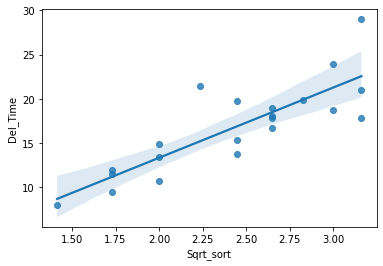

In [59]:
sns.regplot(data_cleaned2['Sqrt_sort'],data_cleaned2['Del_Time'])
plt.show()

In [61]:
model_2 = sm.ols("Del_Time~Sqrt_sort",data_cleaned2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Del_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           2.61e-06
Time:                        17:28:34   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
Sqrt_sort      7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model_2.params

Intercept   -2.518837
Sqrt_sort    7.936591
dtype: float64

In [63]:
model_2.rsquared,model_2.rsquared_adj

(0.6958062276308671, 0.6797960290851233)

In [65]:
model.pvalues,model.tvalues

(Intercept    0.001147
 Sort_Time    0.000004
 dtype: float64,
 Intercept    3.823349
 Sort_Time    6.387447
 dtype: float64)

### Prediction model is
### Del_Time = -2.518837 + 7.936591 * Sqrt_sort

In [67]:
data_cleaned1.head()

,Del_Time,Sort_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [69]:
Log_sort = np.log(data_cleaned1['Sort_Time'])
log_sqrt = pd.DataFrame(Log_sort)

In [71]:
del_time.head()

,Del_Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00


In [76]:
data_cleaned3 = pd.concat([del_time,log_sqrt],join='outer',axis = 1)
data_cleaned3.columns=(['Del_Time','log_sort_time'])
data_cleaned3.head()

,Del_Time,log_sort_time
0,21.00,2.302585
1,13.50,1.386294
2,19.75,1.791759
3,24.00,2.197225
4,29.00,2.302585


In [82]:
data_cleaned3.corr()

,Del_Time,log_sort_time
Del_Time,1.000000,0.833933
log_sort_time,0.833933,1.000000


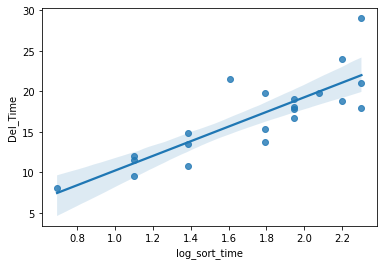

In [83]:
sns.regplot(data_cleaned3['log_sort_time'],data_cleaned3['Del_Time'])
plt.show()

In [78]:
model_3 = sm.ols('Del_Time~log_sort_time',data_cleaned3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Del_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           2.64e-06
Time:                        17:48:45   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1597      2.455      0.472      0.642      -3.978       6.297
log_sort_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
model_3.params

Intercept        1.159684
log_sort_time    9.043413
dtype: float64

In [80]:
model_3.rsquared,model_3.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

In [81]:
model_3.pvalues,model_3.tvalues

(Intercept        0.641980
 log_sort_time    0.000003
 dtype: float64,
 Intercept        0.472460
 log_sort_time    6.586789
 dtype: float64)

#### Prediction model is
### Del_Time = 1.159684 + 9.043413 * log_sort_time

## Que 2.

In [93]:
salary = pd.read_csv("Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [94]:
salary.shape

(30, 2)

In [95]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [96]:
salary_1 = salary.drop_duplicates()


In [97]:
salary_1.shape

(30, 2)

In [98]:
salary_1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

No null values detected

In [100]:
salary_1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [99]:
salary_1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


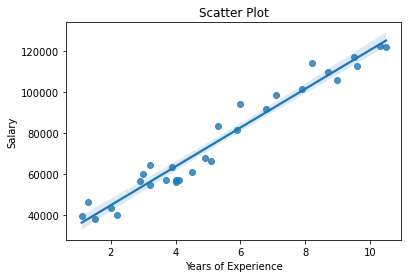

In [101]:
sns.regplot(salary_1.YearsExperience,salary_1.Salary)
plt.title("Scatter Plot")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [131]:
reg_1 = sm.ols("Salary~YearsExperience",data = salary_1).fit()

In [132]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        18:29:26   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
model_1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [134]:
model_1.rsquared, model_1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

So the regression  model is 

   ### Salary = 25792.200199 + 9449.962321 * YearsExperience

## Transformations

In [107]:
salary_1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [123]:
salary_df = pd.DataFrame(salary_1['Salary'])
salary_df.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [115]:
std = StandardScaler()
std_years_exp = std.fit_transform(exp_df)
std_years_exp

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [116]:
std_years_exp_df = pd.DataFrame(std_years_exp)

In [127]:
salary_2 = pd.concat([salary_df,std_years_exp_df],axis = 1, join='outer')
salary_2.columns=(['Salary','std_Years_Exp'])
salary_2.head()

,Salary,std_Years_Exp
0,39343.0,-1.510053
1,46205.0,-1.438373
2,37731.0,-1.366693
3,43525.0,-1.187494
4,39891.0,-1.115814


In [128]:
salary_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Salary         30 non-null     float64
 1   std_Years_Exp  30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [129]:
salary_2.corr()

,Salary,std_Years_Exp
Salary,1.000000,0.978242
std_Years_Exp,0.978242,1.000000


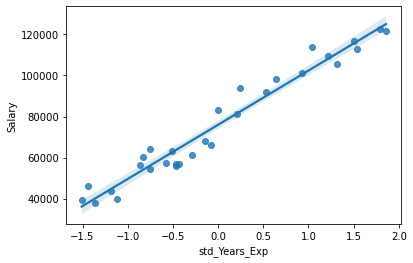

In [130]:
sns.regplot(salary_2['std_Years_Exp'],salary_2['Salary'])
plt.show()

In [135]:
reg_2 = sm.ols('Salary~std_Years_Exp',salary_2).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        18:30:41   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        7.6e+04   1056.797     71.918      0.000    7.38e+04    7.82e+04
std_Years_Exp  2.637e+04   1056.797     24.950      0.000    2.42e+04    2.85e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
reg_2.params

Intercept        76003.000000
std_Years_Exp    26367.182444
dtype: float64

In [138]:
reg_2.rsquared,reg_2.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [140]:
np.round(reg_2.params,2)

Intercept        76003.00
std_Years_Exp    26367.18
dtype: float64

Prediction model is,
### Salary = 76003 + 26367.18 * std_Years_Exp